In [1]:
import os
import pyhepmc
import graphviz
import matplotlib.pyplot as plt
import numpy as np

# check current working directory
os.getcwd()

'/net/e4-nfs-home.e4.physik.tu-dortmund.de/home/cgrunwald/projects/KISS/sherpa.bat/cpp_interface/Batsher'

In [2]:
bat_events = "../output/events_bat.hepmc"
rambo_events = "../output/events_sherpa.hepmc"
sherpa_events = "../standalone/sherpa_events3.hepmc"

In [3]:
bat = {"events": bat_events, "label": "BAT", "color": "#1f77b4"}
#rambo = {"events": rambo_events, "label": "RAMBO", "color": "#2ca02c"}
sherpa = {"events": sherpa_events, "label": "SHERPA", "color": "#ff7f0e"}

In [4]:
# -------- Functions for computing observables -------------------------------------------
def leading_pT(event):
    pT_max = max([p.momentum.pt() for p in event.particles])
    return pT_max

def is_e(p): # is electron or positron
    return abs(p.pid)==11

def invariant_lepton_mass(event):
    e_lepton_momenta = [p.momentum for p in event.particles if is_e(p)]
    m = (e_lepton_momenta[0] + e_lepton_momenta[1]).m()
    return m


def get_observables(sample):
    invariant_mass = []
    weights = []

    with pyhepmc.open(sample["events"]) as f:
        for event in f:
            invariant_mass.append(invariant_lepton_mass(event))
            weights.append(event.weights[0])
        xs = event.attributes["GenCrossSection"].astype(float)
        sample["xs"] = xs

    sample["invariant_mass"] = np.array(invariant_mass)
    sample["weights"] = np.array(weights)

In [5]:
#get_observables(rambo)

In [10]:
get_observables(bat)

test


In [6]:
get_observables(sherpa)

test


In [7]:
# Define your scaling factor
thickness_scaling = 1.5

# Update the default rc settings
plt.rcParams['lines.linewidth'] = 1.5 * thickness_scaling
plt.rcParams['patch.linewidth'] = 1.5 * thickness_scaling
plt.rcParams['lines.markersize'] = 6 * thickness_scaling 
plt.rcParams['font.size'] = 12 * thickness_scaling 

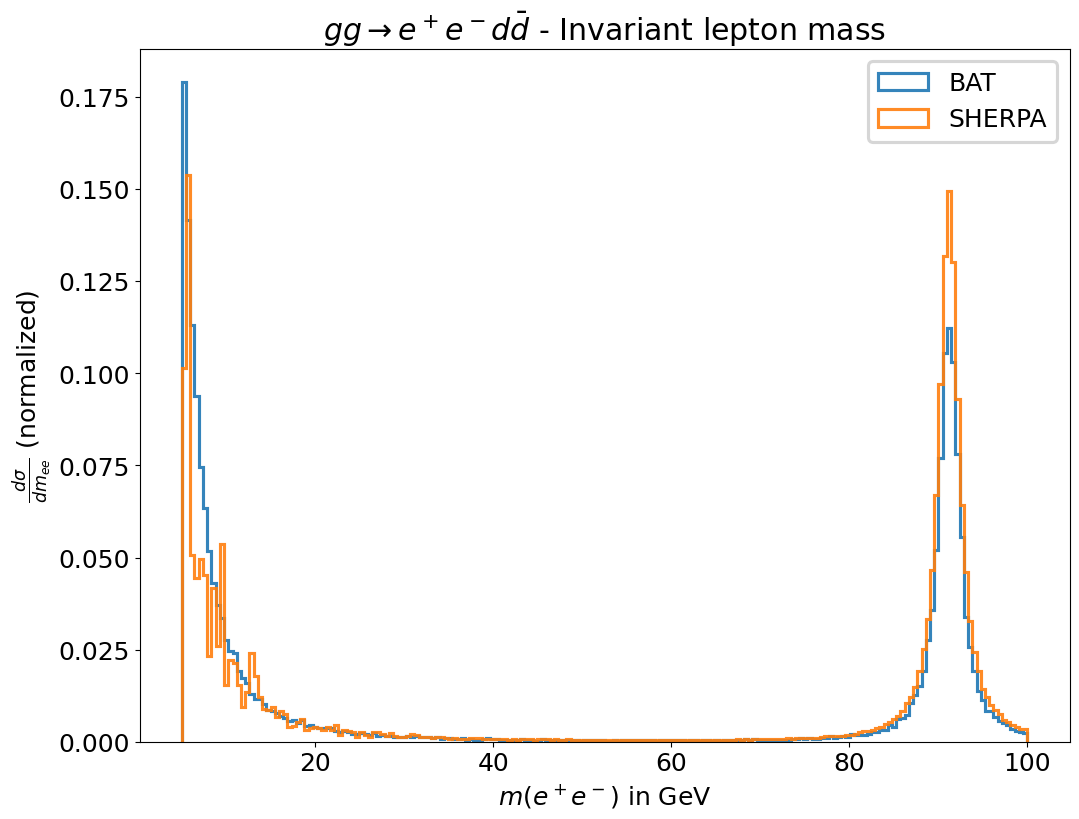

In [13]:

#-------- Plot invariant mass ------------------------------------------------------------
density = True
plt.figure(figsize=(8 * thickness_scaling, 6 * thickness_scaling)) 
x_range = (5, 100)

plt.hist(bat["invariant_mass"], bins=200,  histtype='step', label=bat["label"], color=bat["color"], density=density, alpha=0.9, range=x_range) 

#plt.hist(rambo["invariant_mass"], weights=rambo["weights"]*rambo["xs"]/rambo["weights"].sum(), bins=200,  histtype='step', label=rambo["label"], color=rambo["color"], density=density, alpha=0.9, range=x_range) 

plt.hist(sherpa["invariant_mass"],  weights=sherpa["weights"]*sherpa["xs"]/sherpa["weights"].sum(), bins=200,  histtype='step', label=sherpa["label"], color=sherpa["color"], density=density, alpha=0.9, range=x_range) 


#plt.yscale('log')
plt.legend(loc='best')

plt.xlabel('$m(e^+e^-)$ in GeV')
plt.ylabel('$\\frac{d\\sigma}{d m_{ee}}$ (normalized)')

plt.title('$ gg \\rightarrow e^+ e^- d \\bar d$ - Invariant lepton mass')

# Display the plot
plt.savefig("../output/invariant_mass_new.pdf")
#plt.savefig("../output/invariant_mass_3.png", dpi=400)
plt.show()

In [ ]:
xs = [] 
ws = []

with pyhepmc.open(sherpa["events"]) as f:
        for event in f:
            #invariant_lepton_mass(event))
            xs.append(event.attributes["GenCrossSection"].astype(float))
            ws.append(event.weights)

xs2 = [] 
ws2 = []

with pyhepmc.open(rambo["events"]) as f:
        for event in f:
            #invariant_lepton_mass(event))
            xs2.append(event.attributes["GenCrossSection"].astype(float))
            ws2.append(event.weights)

            
xs3 = [] 
ws3 = []

with pyhepmc.open(bat["events"]) as f:
        for event in f:
            #invariant_lepton_mass(event))
            xs3.append(event.attributes["GenCrossSection"].astype(float))
            ws3.append(event.weights)

NameError: name 'rambo' is not defined

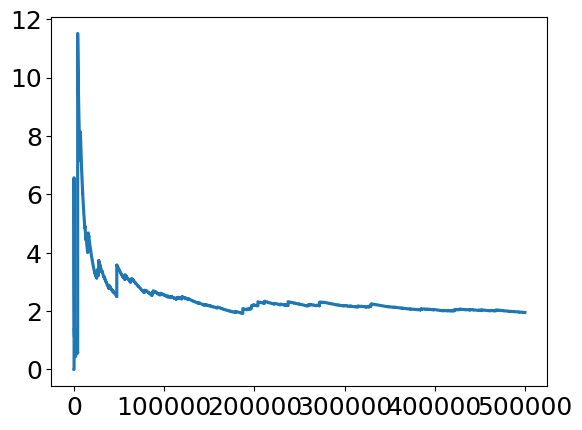

In [ ]:
plt.plot(xs2)

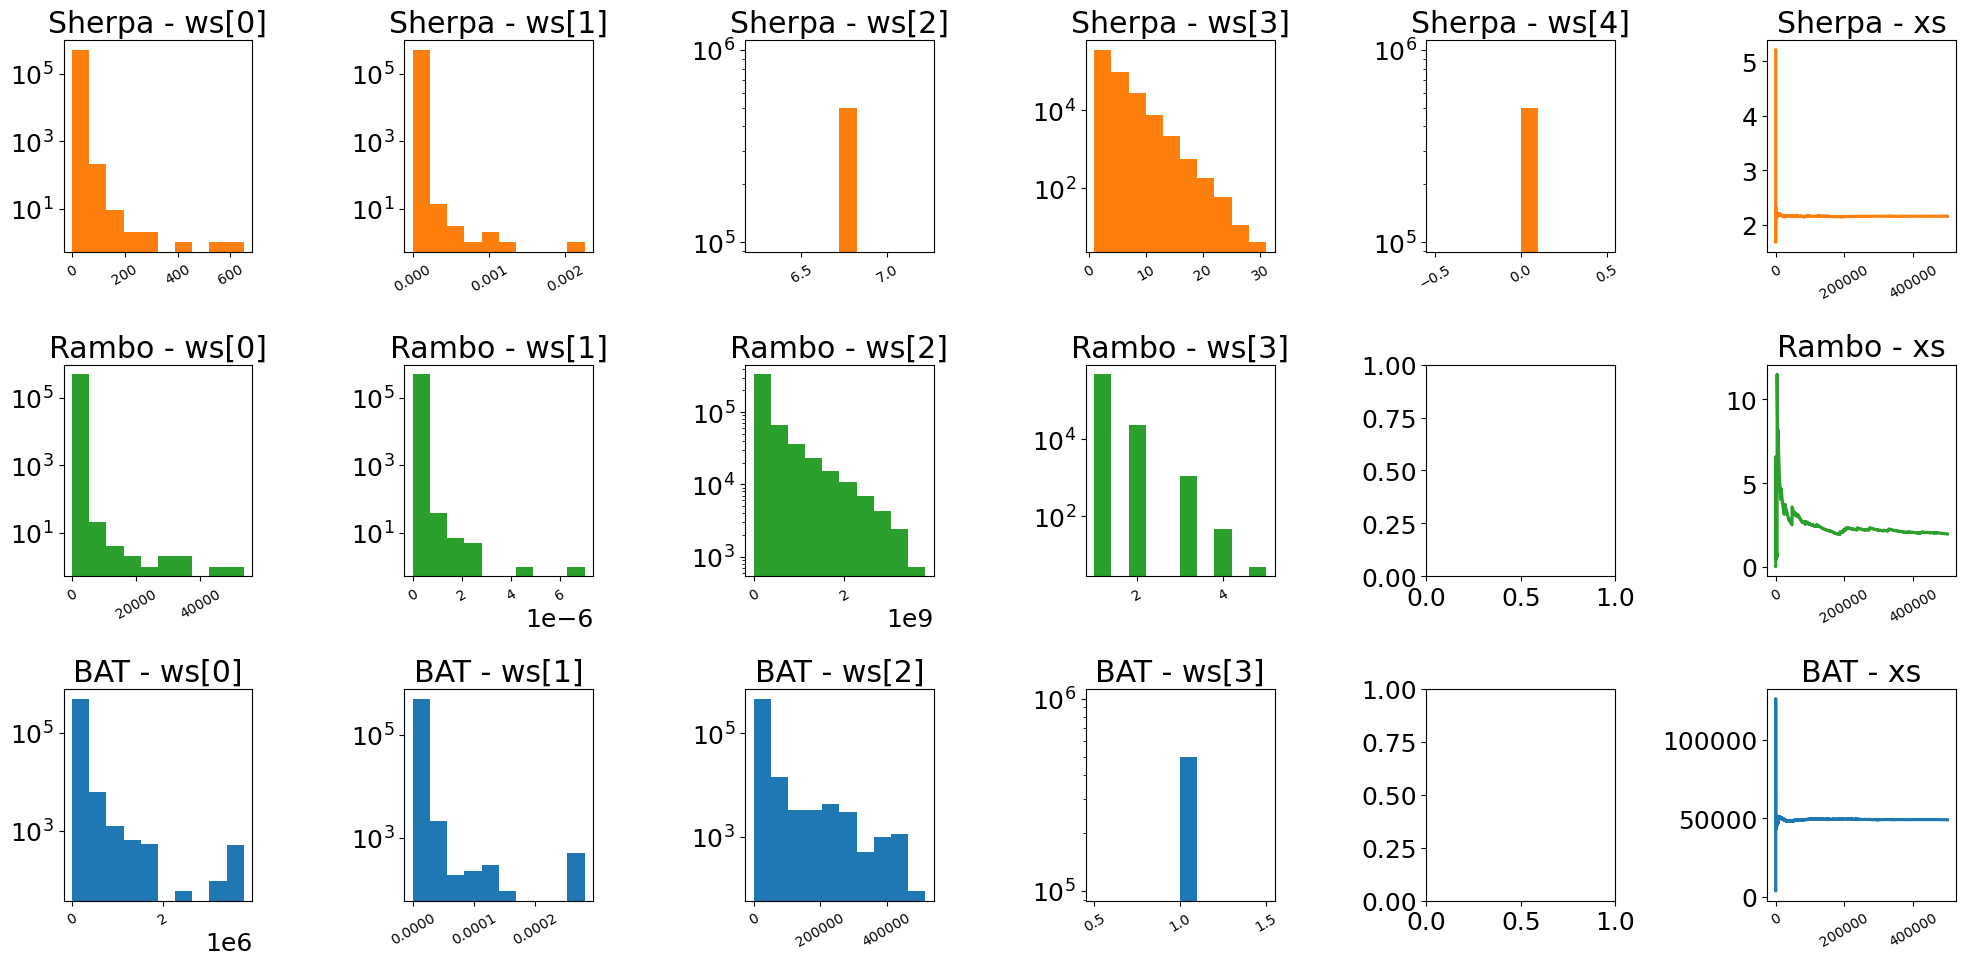

In [ ]:
labelsize = 10
fig, axs = plt.subplots(3, 6, figsize=(20, 10)) 


#---------- Sherpa ----------------------------------------------------
columns = [[row[i] for row in ws] for i in range(len(ws[0]))]

# Plot histograms
for i, key in enumerate(columns):
    axs[0][i].hist(columns[i], color=sherpa["color"])
    axs[0][i].set_yscale('log')
    axs[0][i].set_title(f'Sherpa - ws[{i}]')
    axs[0][i].tick_params(axis='x', labelrotation=30, labelsize=labelsize) 


axs[0][5].plot(xs, color=sherpa["color"])
axs[0][5].set_title('Sherpa - xs')
axs[0][5].tick_params(axis='x', labelrotation=30, labelsize=labelsize) 
#axs[0][5].set_yscale('log')

# #---------- Rambo ----------------------------------------------------
columns = [[row[i] for row in ws2] for i in range(len(ws2[0]))]

# Plot histograms
for i, key in enumerate(columns):
    axs[1][i].hist(columns[i], color=rambo["color"])
    axs[1][i].set_yscale('log')
    axs[1][i].set_title(f'Rambo - ws[{i}]')
    axs[1][i].tick_params(axis='x', labelrotation=30, labelsize=labelsize) 

axs[1][5].plot(xs2, color=rambo["color"])
axs[1][5].set_title('Rambo - xs')
axs[1][5].tick_params(axis='x', labelrotation=30, labelsize=labelsize) 
#axs[1][5].set_yscale('log')


# #--------- BAT ---------------------------------------------------
columns = [[row[i] for row in ws3] for i in range(len(ws3[0]))]

# Plot histograms
for i, key in enumerate(columns):
    axs[2][i].hist(columns[i], color=bat["color"])
    axs[2][i].set_yscale('log')
    axs[2][i].set_title(f'BAT - ws[{i}]')
    axs[2][i].tick_params(axis='x', labelrotation=30,labelsize=labelsize) 

axs[2][5].plot(xs3, color=bat["color"])
axs[2][5].set_title('BAT - xs')
axs[2][5].tick_params(axis='x', labelrotation=30, labelsize=labelsize) 
#axs[2][5].set_yscale('log')

# Display the plot
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

plt.savefig("../output/weights_xs.pdf")
plt.show()


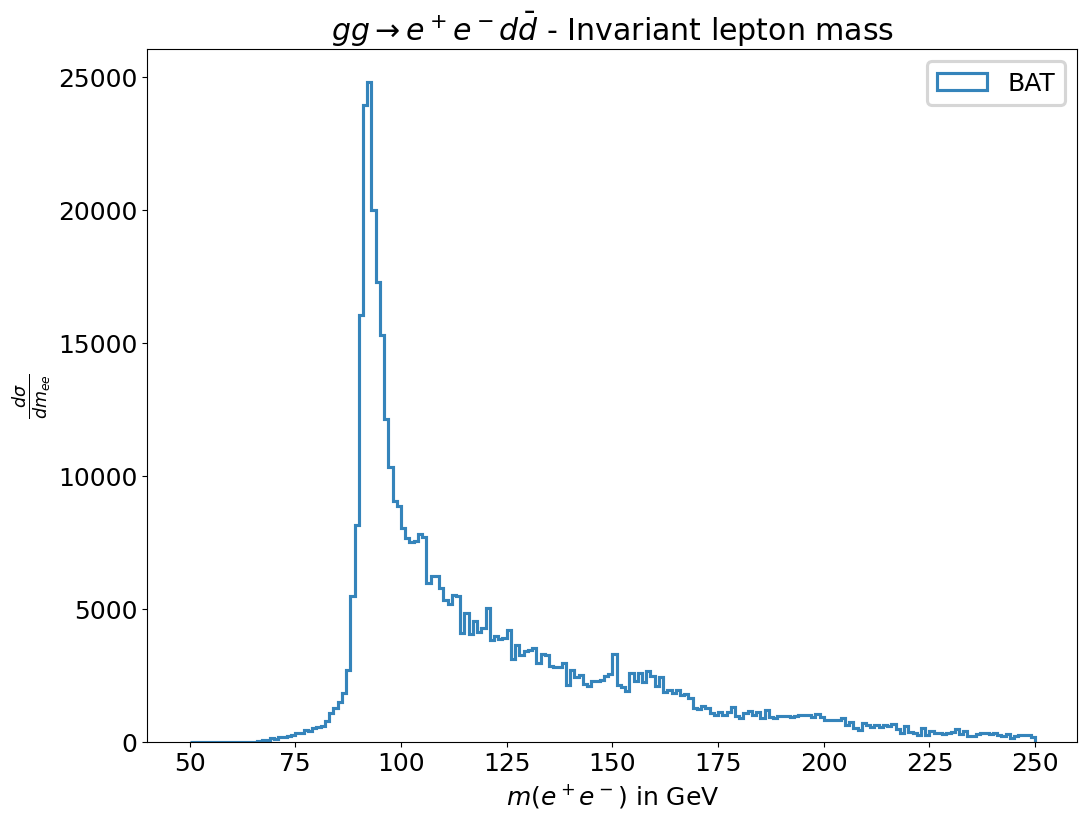

In [ ]:
#-------- Plot invariant mass ------------------------------------------------------------
density = False
plt.figure(figsize=(8 * thickness_scaling, 6 * thickness_scaling)) 
x_range = (50, 250)

plt.hist(bat["invariant_mass"], bins=200,  histtype='step', label=bat["label"], color=bat["color"], density=density, alpha=0.9, range=x_range) 
#plt.hist(bat["invariant_mass"],  weights=bat["weights"]*bat["xs"]/bat["weights"].sum(), bins=200,  histtype='step', label=bat["label"], color="blue", density=density, alpha=0.9, range=x_range) 

#plt.hist(rambo["invariant_mass"], weights=rambo["weights"]*rambo["xs"]/rambo["weights"].sum(), bins=200,  histtype='step', label=rambo["label"], color=rambo["color"], density=density, alpha=0.9, range=x_range) 

#plt.hist(sherpa["invariant_mass"],  weights=sherpa["weights"]*sherpa["xs"]/sherpa["weights"].sum(), bins=200,  histtype='step', label=sherpa["label"], color=sherpa["color"], density=density, alpha=0.9, range=x_range) 
#plt.hist(sherpa["invariant_mass"], bins=200,  histtype='step', label=sherpa["label"], color="green", density=density, alpha=0.9, range=x_range) 


#plt.yscale('log')
plt.legend(loc='best')

plt.xlabel('$m(e^+e^-)$ in GeV')
plt.ylabel('$\\frac{d\\sigma}{d m_{ee}}$')

plt.title('$ gg \\rightarrow e^+ e^- d \\bar d$ - Invariant lepton mass')

# Display the plot
plt.savefig("../output/invariant_mass_BAT.pdf")
#plt.savefig("../output/invariant_mass_3.png", dpi=400)
plt.show()